In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/MyDrive/CompetishunAssignment/leads_basic_details.csv")
df_demowatched=pd.read_csv('/content/drive/MyDrive/CompetishunAssignment/leads_demo_watched_details.csv')
df_interaction=pd.read_csv("/content/drive/MyDrive/CompetishunAssignment/leads_interaction_details.csv")
df_reason=pd.read_csv("/content/drive/MyDrive/CompetishunAssignment/leads_reasons_for_no_interest.csv")
df_sales=pd.read_csv("/content/drive/MyDrive/CompetishunAssignment/sales_managers_assigned_leads_details.csv")

In [6]:
#Lead Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [7]:
df.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [9]:
for i in df.columns:
  print(i,'\n',df[i].unique(),'\n')

lead_id 
 ['USR1001' 'USR1002' 'USR1003' 'USR1004' 'USR1005' 'USR1006' 'USR1007'
 'USR1008' 'USR1009' 'USR1010' 'USR1011' 'USR1012' 'USR1013' 'USR1014'
 'USR1015' 'USR1016' 'USR1017' 'USR1018' 'USR1019' 'USR1020' 'USR1021'
 'USR1022' 'USR1023' 'USR1024' 'USR1025' 'USR1026' 'USR1027' 'USR1028'
 'USR1029' 'USR1030' 'USR1031' 'USR1032' 'USR1033' 'USR1034' 'USR1035'
 'USR1036' 'USR1037' 'USR1038' 'USR1039' 'USR1040' 'USR1041' 'USR1042'
 'USR1043' 'USR1044' 'USR1045' 'USR1046' 'USR1047' 'USR1048' 'USR1049'
 'USR1050' 'USR1051' 'USR1052' 'USR1053' 'USR1054' 'USR1055' 'USR1056'
 'USR1057' 'USR1058' 'USR1059' 'USR1060' 'USR1061' 'USR1062' 'USR1063'
 'USR1064' 'USR1065' 'USR1066' 'USR1067' 'USR1068' 'USR1069' 'USR1070'
 'USR1071' 'USR1072' 'USR1073' 'USR1074' 'USR1075' 'USR1076' 'USR1077'
 'USR1078' 'USR1079' 'USR1080' 'USR1081' 'USR1082' 'USR1083' 'USR1084'
 'USR1085' 'USR1086' 'USR1087' 'USR1088' 'USR1089' 'USR1090' 'USR1091'
 'USR1092' 'USR1093' 'USR1094' 'USR1095' 'USR1096' 'USR1097' 'USR10

In [10]:
#age can't be greater than 35 for our lead so below is our outlier
df[df.age >35]

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


Remove Outlier

In [11]:
#let's remove outliers
df=df[df.age<=35]

In [60]:
df_demowatched=df_demowatched[df_demowatched.watched_percentage<100]

<Axes: xlabel='age', ylabel='age'>

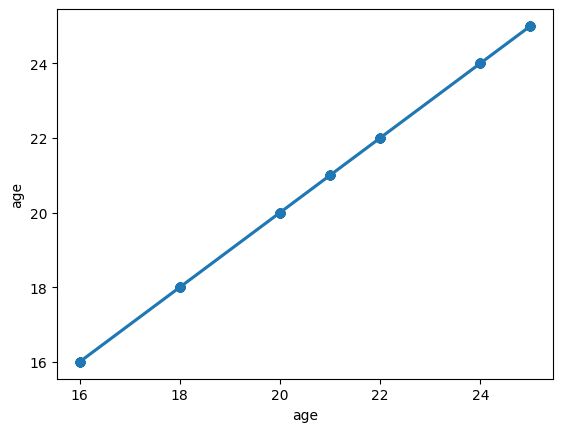

In [12]:
sns.regplot(x='age',y='age',data=df)

<Axes: xlabel='age', ylabel='count'>

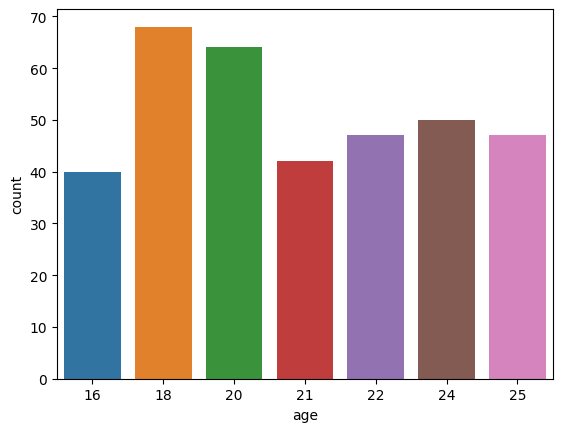

In [13]:
sns.countplot(x='age',data=df)

<Axes: xlabel='gender', ylabel='count'>

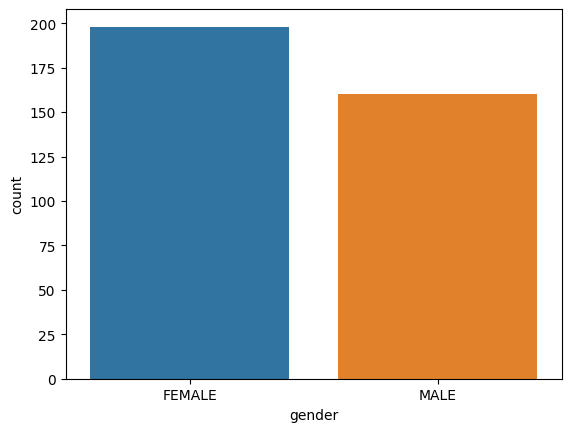

In [14]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='current_city', ylabel='count'>

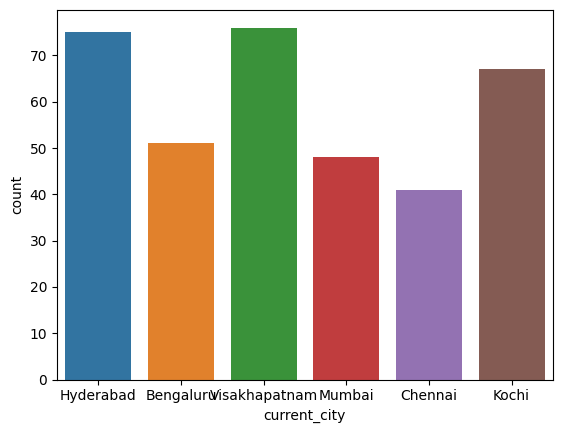

In [16]:
sns.countplot(x='current_city',data=df)

<Axes: xlabel='lead_gen_source', ylabel='count'>

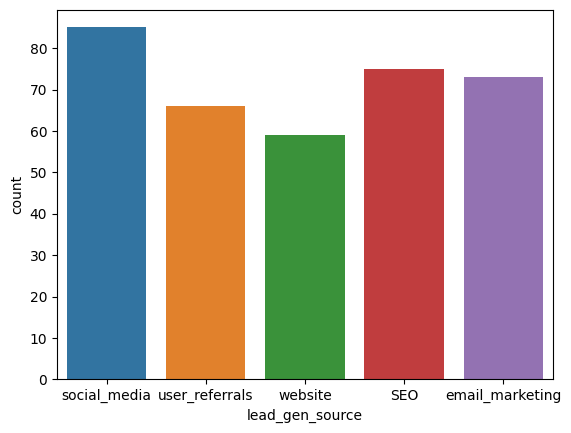

In [17]:
sns.countplot(x='lead_gen_source',data=df)

## leads_demo_watched_details

In [21]:
#
df_demowatched.columns

Index(['lead_id', 'demo_watched_date', 'language', 'watched_percentage'], dtype='object')

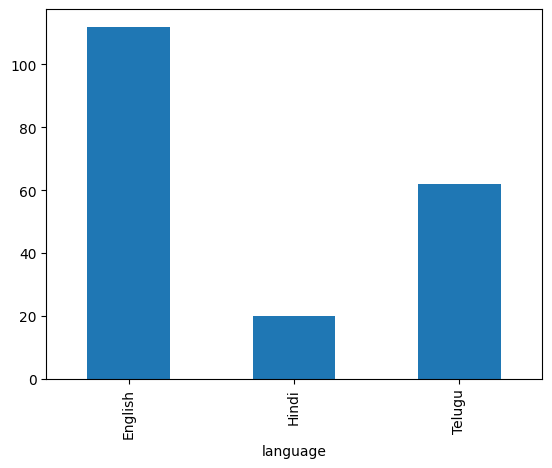

In [32]:
df_lang=df_demowatched.groupby('language').size().plot(kind='bar')

In [34]:
import matplotlib.pyplot as plt

In [36]:
grp1=df.groupby('current_city').size()

Text(0, 0.5, 'Lead Count')

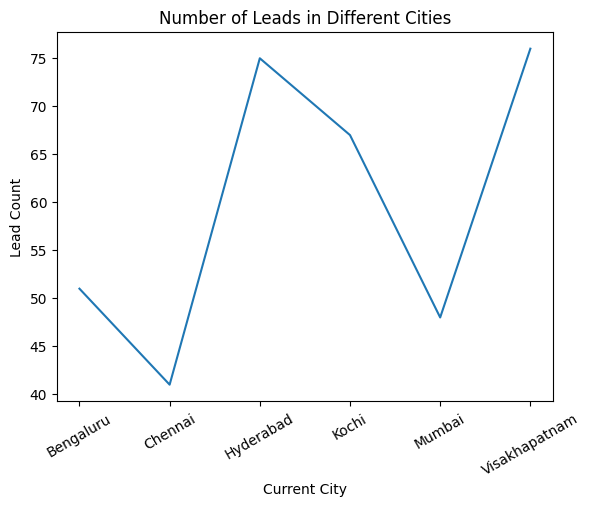

In [41]:
grp1.plot(kind="line")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Number of Leads in Different Cities")
plt.xlabel("Current City")
plt.ylabel("Lead Count")

In [62]:
Lead_merge_demowatched=pd.merge(df,df_demowatched, on='lead_id',how='inner')

In [63]:
lang_city=Lead_merge_demowatched.groupby(['language', 'current_city']).size()

In [64]:
lang_city

language  current_city 
English   Bengaluru        22
          Chennai          16
          Hyderabad        19
          Kochi            19
          Mumbai           10
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

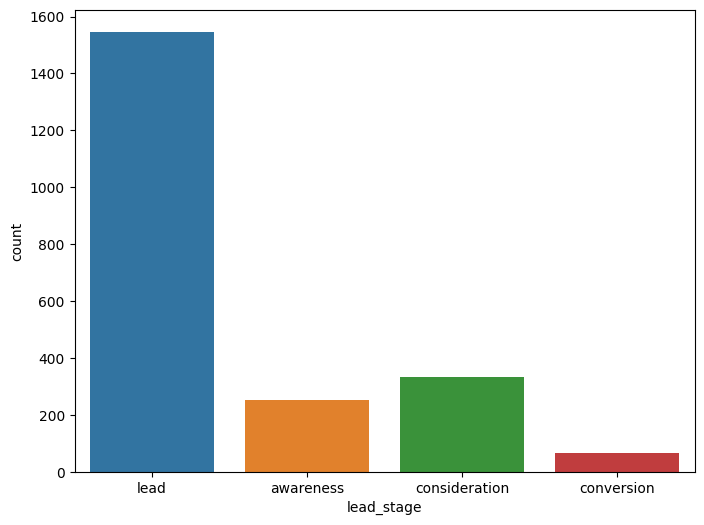

In [65]:
countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'lead_stage', data=df_interaction)

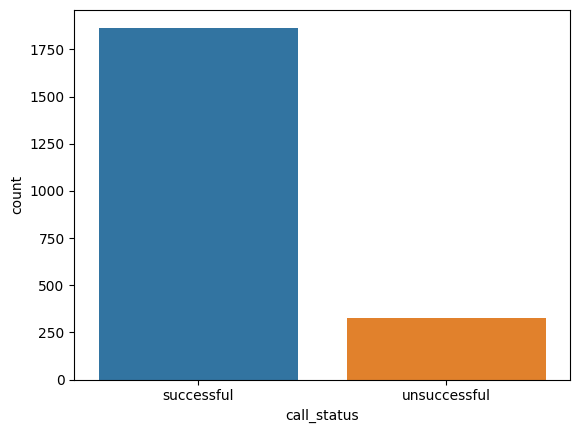

In [66]:
countplt, ax = plt.subplots()
ax =sns.countplot(x = 'call_status', data=df_interaction)

Text(0, 0.5, 'Count')

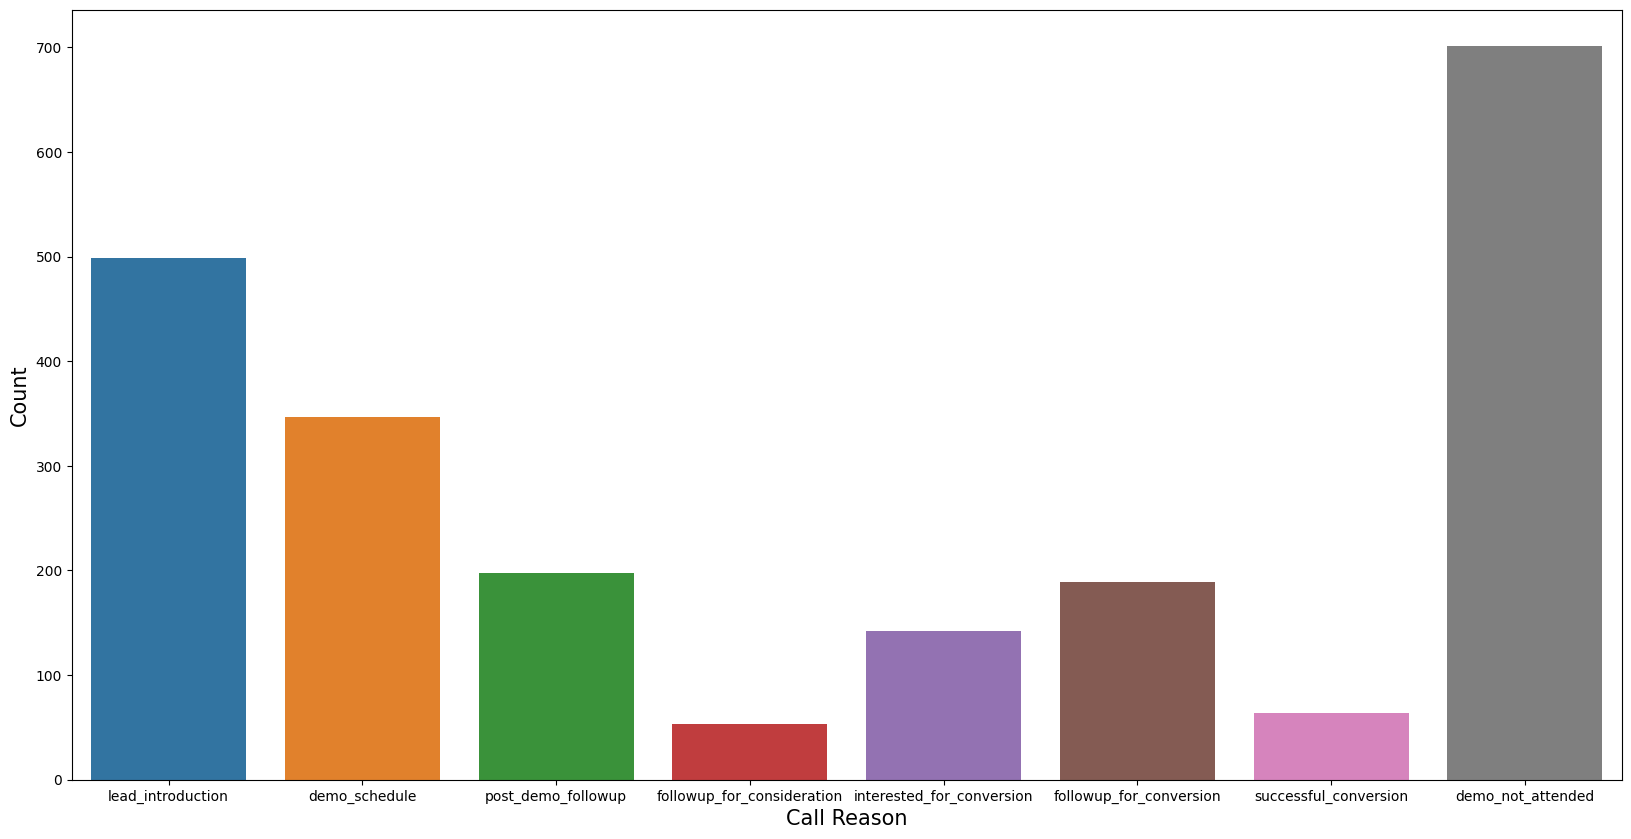

In [67]:
countplt, ax = plt.subplots(figsize = (20,10))
ax =sns.countplot(x = 'call_reason', data=df_interaction)
plt.xlabel( "Call Reason" , size = 15 )
plt.ylabel( "Count" , size = 15 )


In [68]:
merge_interaction=pd.merge(Lead_merge_demowatched,df_interaction, on='lead_id',how='inner')
merge_interaction.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,1/4/2022,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,1/4/2022,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,1/4/2022,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,1/4/2022,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion


<Axes: xlabel='lead_stage', ylabel='watched_percentage'>

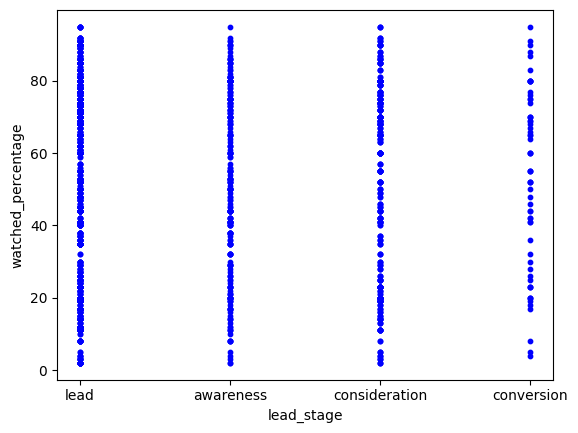

In [69]:
merge_interaction.plot.scatter(x = 'lead_stage', y = 'watched_percentage', s=10, c='blue')

<Axes: xlabel='language', ylabel='watched_percentage'>

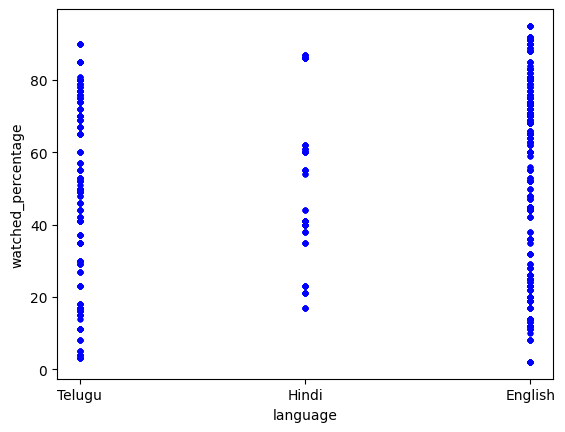

In [70]:
merge_interaction.plot.scatter(x = 'language', y = 'watched_percentage', s=10, c='blue')

Text(0.5, 1.0, 'Distribution of Reasons for not interested in demo')

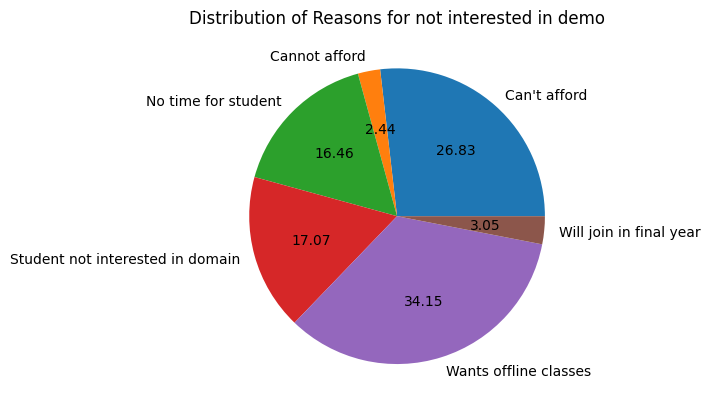

In [71]:
ax = df_reason.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Distribution of Reasons for not interested in demo")

Text(0.5, 1.0, 'Distribution of Reasons for not interested to consider')

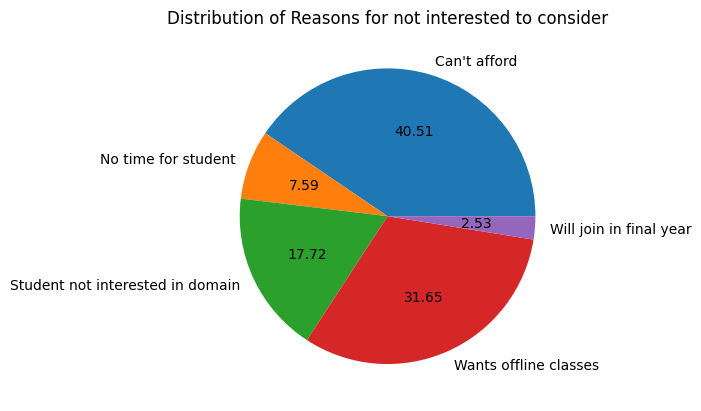

In [72]:
ax = df_reason.groupby('reasons_for_not_interested_to_consider').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Distribution of Reasons for not interested to consider")

Text(0.5, 1.0, 'Distribution of Reasons for not interested to convert')

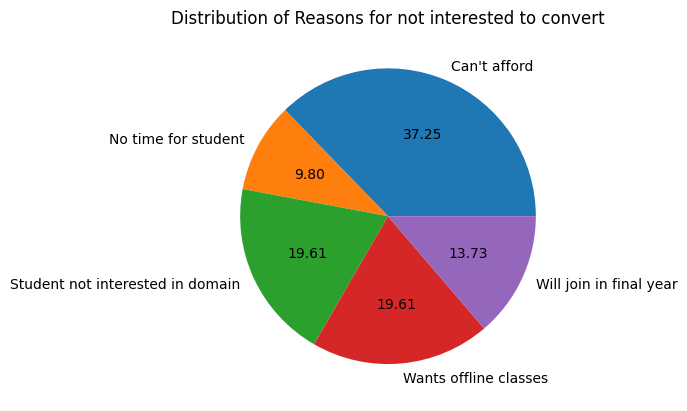

In [73]:
ax = df_reason.groupby('reasons_for_not_interested_to_convert').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Distribution of Reasons for not interested to convert")

In [74]:
Lead_merge_reason=pd.merge(df,df_reason, on='lead_id',how='inner')

In [76]:
Lead_merge_reason.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,No time for student,NaN,NaN
1,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals,NaN,No time for student,NaN
2,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals,NaN,Wants offline classes,NaN
3,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals,NaN,Can't afford,NaN
4,USR1006,16,MALE,Kochi,Intermediate,Doctor,user_referrals,NaN,Student not interested in domain,NaN


<Axes: >

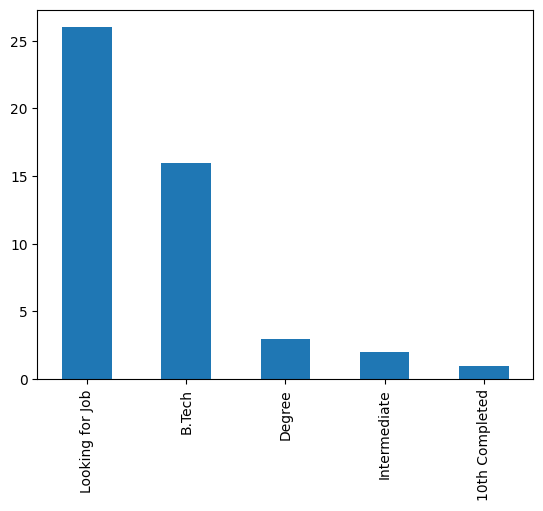

In [82]:
lmr=Lead_merge_reason.query('reasons_for_not_interested_in_demo == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()
lmr.plot(kind='bar')

<Axes: >

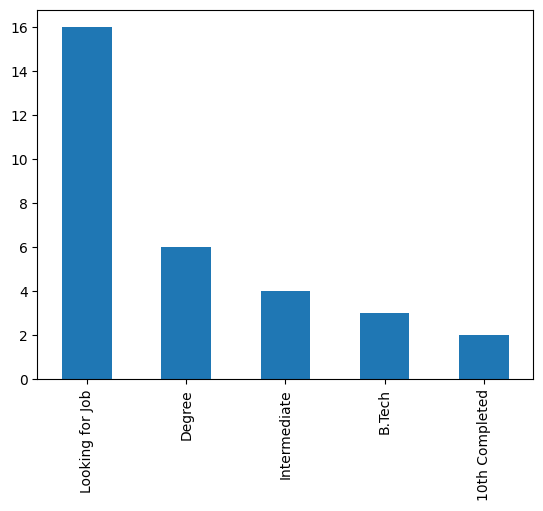

In [83]:
lmr1=Lead_merge_reason.query('reasons_for_not_interested_to_consider == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()
lmr1.plot(kind='bar')

<Axes: >

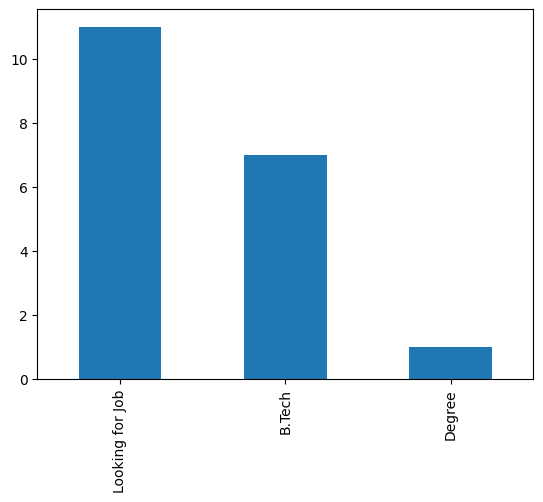

In [84]:
lmr2=Lead_merge_reason.query('reasons_for_not_interested_to_convert == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()
lmr2.plot(kind='bar')

<Axes: >

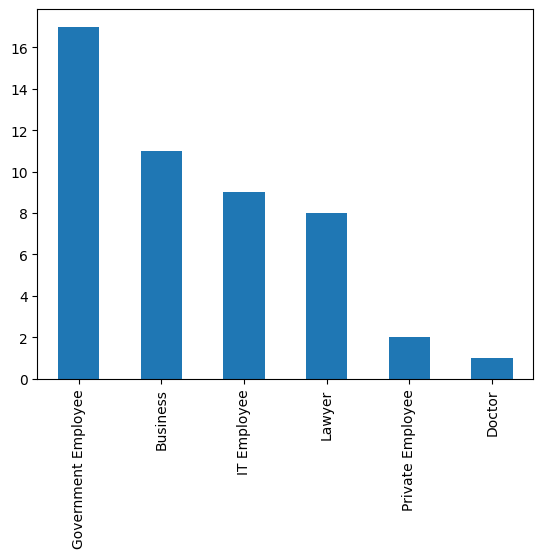

In [85]:
lmr3=Lead_merge_reason.query('reasons_for_not_interested_in_demo == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()
lmr3.plot(kind='bar')